In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
%config InlineBackend.figure_format='svg'

In [4]:
def CompNDNatPointsTri3(xi_vec,eta_vec):
    if xi_vec.ndim >= 2:
        N1 = 1 - xi_vec - eta_vec
        N2 = xi_vec
        N3 = eta_vec
        return N1, N2, N3
    else:
        n = len(xi_vec)
        N = np.zeros((3,n))
        Nx = np.zeros((3,n))
        Ny = np.zeros((3,n))

        for i,(xi,eta) in enumerate(zip(xi_vec,eta_vec)):
            N[0,i] = 1 - xi - eta
            N[1,i] = xi
            N[2,i] = eta
            Nx[0,i] = -1.0
            Nx[1,i] = 1.0
            Nx[2,i] = 0
            Ny[0,i] = -1.0
            Ny[1,i] = 0
            Ny[2,i] = 1.0
        return N, Nx, Ny


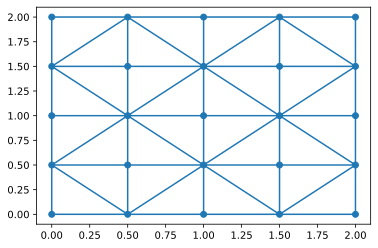

In [21]:
L = 2
H = 2
tz = 0.05
nx_squares = 4
ny_squares = 4
n_elems = 2*nx_squares*ny_squares
nx_nodes = nx_squares + 1
ny_nodes = ny_squares + 1
nodes = []
for x in np.linspace(0,L,nx_nodes):
    for y in np.linspace(0,H,ny_nodes):
        nodes.append([x,y])
nodes = np.array(nodes)
tri = Delaunay(nodes)
plt.triplot(nodes[:,0],nodes[:,1],tri.simplices)
plt.scatter(nodes[:,0],nodes[:,1])

In [22]:
with open('nodes.csv','w') as f:
    f.write('node x y\n')
    for i, node in enumerate(nodes):
        f.write(f'{i} {node[0]} {node[1]}\n')

with open('triangulation.csv','w') as f:
    f.write('element node1 node2 node3\n')
    for i, element in enumerate(tri.simplices):
        f.write(f'{i} {element[0]} {element[1]} {element[2]}\n')